In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
import time

Most popular research deep learning framework. Write fast deep learning code in Python, accelerated by GPUs. Originally designed and used in-house by Facebook/Meta (now open-source and used by companies such as Tesla, Microsoft, OpenAI)

In [3]:
print(torch.__version__)

2.3.1


In [4]:
# Introduction to Tensors

In [5]:
scalar = torch.tensor(10)

In [6]:
scalar

tensor(10)

In [7]:
# Find the dimension of scalars
scalar.ndim

0

In [8]:
# get tensor back as Python int
scalar.item()

10

In [9]:
# Vector
vector = torch.tensor([10, 10])
vector

tensor([10, 10])

In [10]:
# one dimension! --> the number of square brackets!
vector.ndim

1

In [11]:
# The shape of the vector is 2 --> 2x1 element
vector.shape

torch.Size([2])

In [12]:
# MATRIX
MATRIX = torch.tensor([[7, 8],
                       [10,10]])

In [13]:
MATRIX

tensor([[ 7,  8],
        [10, 10]])

In [14]:
MATRIX.ndim, MATRIX.shape

(2, torch.Size([2, 2]))

In [15]:
# Access to rows and columns
MATRIX[0], MATRIX[:,0]

(tensor([7, 8]), tensor([ 7, 10]))

In [16]:
# TENSOR
TENSOR = torch.tensor([[[1, 5, 10],
                        [6, 6, 6],
                        [2, 5, 5]]])
TENSOR

tensor([[[ 1,  5, 10],
         [ 6,  6,  6],
         [ 2,  5,  5]]])

In [17]:
# The zero-th dimension is 1
TENSOR.ndim, TENSOR.shape

(3, torch.Size([1, 3, 3]))

In [18]:
# Notice this:
TENSOR[0]

tensor([[ 1,  5, 10],
        [ 6,  6,  6],
        [ 2,  5,  5]])

Notice that the meaning is to have a 1 3x3 matrix into a tensor of dimension 1x3x3. That's why `TENSOR[0]` return actually the "entire" matrix apparently. 

In [19]:
TENSOR[:,1]

tensor([[6, 6, 6]])

In [20]:
TENSOR[:,:,2]

tensor([[10,  6,  5]])

For matrix and tensor, generally it's a best practice to use uppercase in Python. 

### Random Tensors

Random tensors are important because neural networks learning start with tensors full of random numbers and then these numbers are adjusted to better represent data.

In [21]:
# We can create a random tensor of shape  (5,5)
random_tensor = torch.rand(5,5)
random_tensor

tensor([[0.4401, 0.3627, 0.4315, 0.8589, 0.8016],
        [0.3877, 0.0929, 0.1077, 0.6171, 0.7072],
        [0.5545, 0.0716, 0.4267, 0.9968, 0.7742],
        [0.1721, 0.0894, 0.7773, 0.2432, 0.6365],
        [0.2687, 0.0304, 0.9865, 0.2493, 0.1140]])

In [22]:
# Create a random tensor with similar shape to an image tensor
random_image_tensor = torch.rand(size=(224, 224, 3))
random_image_tensor.shape, random_image_tensor.ndim

(torch.Size([224, 224, 3]), 3)

224 x 224 is the dimensions of the image, in terms of height, width, while 3 represent the color channels. So basically, we have a sort of "matrix" 224 x 224 dimensional, where each element is actually a 3-compontent vector, where each element represents the proportion of red, blue and green for that pixel.

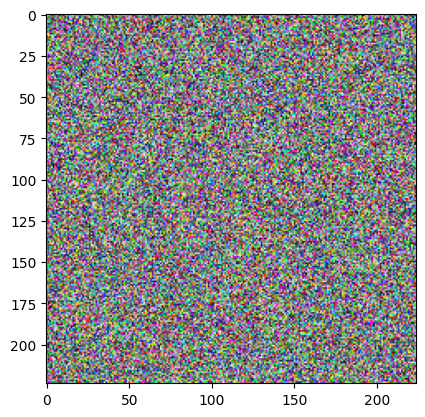

In [23]:
plt.imshow(random_image_tensor)

In [24]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(5,5))
zeros

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [25]:
zeros*random_tensor

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [26]:
# Create a tensor of all ones
ones = torch.ones(size=(5,5))
ones.dtype

torch.float32

In [27]:
ones

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [28]:
##  Create a range of tensors and tensors-like
one_to_hun = torch.arange(start=0,end=110, step=10)

In [29]:
# Creating tensors like
ten_zeros = torch.zeros_like(one_to_hun)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor Datatypes

In [30]:
# The default datatype is float32!
float_32_tensor = torch.tensor([1.0, 2.0, 3.0], dtype=None)

In [31]:
float_32_tensor.dtype

torch.float32

In [32]:
float_16_tensor = torch.tensor([1.0, 2.0, 3.0], 
                               dtype=torch.float16,
                               device=None,
                               requires_grad=False)

In [33]:
float_16_tensor.dtype

torch.float16

- **dtype**: specify the datatypes, which is related to the precision of numerical representions. The default is 32bits, which means that 32bits of memory are used to store each number filling the tensor components. Pay attention to datatypes of tensors when you manipulate them, because otherwise you may encounter numerical precision problems;
- **device**: the default is `cpu` but one may set also to `cuda`, which means that tensors leverage GPU acceleration. **We cannot perform operations between tensors on different devices!**
- **requires_grad**: track gradients or not. 

In [34]:
tensor1_float16 = torch.tensor([1, 1, 1], dtype=torch.float16)
tensor1_float32 = torch.tensor([1, 1, 1])

In [35]:
tensor1_float16+tensor1_float32

tensor([2., 2., 2.], dtype=torch.float16)

In [36]:
# Converting tensor datatypes
tensor1_converted = tensor1_float32.type(torch.float32)
tensor1_converted.dtype

torch.float32

In [37]:
tensor1_float16*tensor1_float32

tensor([1., 1., 1.], dtype=torch.float16)

When you multiply or sum two tensors with different datatypes, the resulting tensor has the min datatype (`float16` if you multiply `float16` with `float32`).

In [38]:
# Getting information from a tensors
print(tensor1_float16)
print(f"Datatype of tensor: {tensor1_float16.dtype}")
print(f"Shape of tensor: {tensor1_float16.shape}")
print(f"Device tensor is on: {tensor1_float16.device}")

tensor([1., 1., 1.], dtype=torch.float16)
Datatype of tensor: torch.float16
Shape of tensor: torch.Size([3])
Device tensor is on: cpu


In [39]:
# Another method to get the shape is .size(), which is not an attribute but a methjod
tensor1_float16.size()

torch.Size([3])

## Manipulating Tensors: `tensor` algebra

- addition
- subtraction
- multiplication (element-wise)
- division
- matrix multiplication

In [40]:
# Create a tenso and add 10 to it
tensor = torch.tensor([1, 2, 3])
tensor + 100

tensor([101, 102, 103])

In [41]:
# Multiply by a scalar
tensor * 100

tensor([100, 200, 300])

In [42]:
# Divide or subtract  by a scalar
tensor / 2, tensor - 1

(tensor([0.5000, 1.0000, 1.5000]), tensor([0, 1, 2]))

In [43]:
# Pytorch has only built-in functions
tensor.add(2), tensor.mul(2), tensor.div(2), tensor.sub(2)

(tensor([3, 4, 5]),
 tensor([2, 4, 6]),
 tensor([0.5000, 1.0000, 1.5000]),
 tensor([-1,  0,  1]))

### Matrix Multiplication

Two main ways of performing multiplication in neural networks and deep learning:
1. Element-wise multiplication: this is the simplest case, where we multiply tensors element-wise
2. Matrix multiplication: this is a multiplication between two tensors involving dot products

In [44]:
print(tensor, "*", tensor)
print(tensor * tensor)

tensor([1, 2, 3]) * tensor([1, 2, 3])
tensor([1, 4, 9])


In [45]:
# Matrix multiplication
torch.matmul(tensor, tensor)

tensor(14)

Notice that in the element-wise multiplication, we have started from a vector of shape 3x1, and we have ended up with a 3x1 vector too. Instead, in the matrix multiplication, we have multiplied a 1x3 vector by a 3x1 vector to get a 1x1 vector (i.e. a scalar). See below.

In [46]:
%%time
value = 0
for i in range(len(tensor)):
    value += tensor[i] * tensor[i]
print(value)

tensor(14)
CPU times: user 652 μs, sys: 895 μs, total: 1.55 ms
Wall time: 1.36 ms


In [47]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 81 μs, sys: 20 μs, total: 101 μs
Wall time: 93.9 μs


tensor(14)

There are two main rules to consider when performing matrix multiplication:
1. The **inner dimensions** must match: `(3, 2) @ (3, 2)` this won't work because number of columns of first tensor does not match the number of rows of the second tensor.
2. The resulting matrix has the shape of the **outer dimensions**: `(3,2) @ (2,3)` results in a matrix of dimension `(3,3)`.

In [48]:
torch.rand(1, 3, 3), torch.rand(1, 3, 3).shape

(tensor([[[0.3806, 0.9379, 0.8089],
          [0.0021, 0.8281, 0.6868],
          [0.3623, 0.6330, 0.7822]]]),
 torch.Size([1, 3, 3]))

In [49]:
torch.matmul(torch.rand(1, 3, 3), torch.rand(3, 3, 1))

tensor([[[0.7566],
         [0.2797],
         [0.3750]],

        [[1.3197],
         [1.1190],
         [0.9377]],

        [[1.1161],
         [1.0025],
         [0.8074]]])

In [50]:
tensor_A = torch.tensor([[1, 2],
                         [3,4],
                         [5, 6]])

tensor_B  = torch.tensor([[7,10],
                          [8, 11],
                          [9, 12]])

In [51]:
# If we try to multiply these tensors we will get an error!
#torch.matmul(tensor_A, tensor_B)

In [52]:
tensor_A.shape, tensor_B.shape

(torch.Size([3, 2]), torch.Size([3, 2]))

We can fix this shape issue, manipulating the shape of one of our tensors, using the **transpose** operation.

In [53]:
tensor_B.T.shape

torch.Size([2, 3])

In [54]:
tensor_B, tensor_B.T

(tensor([[ 7, 10],
         [ 8, 11],
         [ 9, 12]]),
 tensor([[ 7,  8,  9],
         [10, 11, 12]]))

In [55]:
# Now we can multiply tensors:
torch.matmul(tensor_A, tensor_B.T)

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

### Aggregations: `min`, `max`, `mean` and `sum`

In [56]:
# Create a tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [57]:
# Find the min, max
torch.min(x), x.min()
torch.max(x), x.max()

(tensor(90), tensor(90))

If we try `torch.mean(x)` right now we would get an errore because the datatype of `x` is LongInt. Instead, we need a float datatype tensor to compute means!

In [58]:
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(45.), tensor(45.))

In [59]:
torch.sum(x), x.sum()

(tensor(450), tensor(450))

In [60]:
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [61]:
x.argmin(), x.argmax()

(tensor(0), tensor(9))

### Reshaping, Stacking, Squeezing and Unsqueezing

- Reshaping : reshapes an input tensor to a defined shape
- View: return a view of an input tensor of certain shape but keep the same memory as the original tensor
- Stacking: combine multiple tensor on top of each other (vstack, hstack)
- Squeeze : removes all `1` dimensions from a tensor
- Unsqueeze : add a `1` dimension to a target tensor
- Permute: return a view of the input with dimensons permuted (swapped) in a certain way

In [62]:
y = torch.arange(1., 10.)

In [63]:
y, y.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [64]:
# add an extra dimension
y_reshaped = y.reshape(3, 3)
y_reshaped

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [65]:
# Change the view
z  = y.view(1, 9)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

With view, the two tensors share the same memory space. Therefore, changing `z` will change also `y`:

In [66]:
z[:, 0] = 5

In [67]:
z, y

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [68]:
# Stack tensors
y_stacked =  torch.stack([x, x])

In [69]:
y_stacked, y_stacked.shape

(tensor([[ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
         [ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]]),
 torch.Size([2, 10]))

In [70]:
y_stacked_dim1 =  torch.stack([x, x], dim=1)

In [71]:
y_stacked_dim1, y_stacked_dim1.shape

(tensor([[ 0,  0],
         [10, 10],
         [20, 20],
         [30, 30],
         [40, 40],
         [50, 50],
         [60, 60],
         [70, 70],
         [80, 80],
         [90, 90]]),
 torch.Size([10, 2]))

In [72]:
# Squeeze and Unsqueeze
w = torch.tensor([2, 2])

In [73]:
w.shape

torch.Size([2])

In [74]:
w_squeezed = w.squeeze()

In [75]:
w_squeezed.shape

torch.Size([2])

In [76]:
u = torch.tensor([[2, 2]])
u.shape

torch.Size([1, 2])

In [77]:
u_squeezed = u.squeeze()
u_squeezed, u_squeezed.shape

(tensor([2, 2]), torch.Size([2]))

In [78]:
u_unsqueezed = u_squeezed.unsqueeze(dim=0)
u_unsqueezed, u_unsqueezed.shape

(tensor([[2, 2]]), torch.Size([1, 2]))

In [79]:
# permute: returns a view of the original tensor 
z = torch.randn(size=(224, 224, 3))
z.size()

torch.Size([224, 224, 3])

In [80]:
# Permute to rearrange axis (or dim) order, putting the color channel as the first dimension
z_permuted = z.permute(2, 0, 1)

In [81]:
z_permuted.shape

torch.Size([3, 224, 224])

## Indexing

Indexing in PyTorch is very similar to indexing in NumPy.

In [82]:
x = torch.arange(1, 10).reshape(1, 3, 3)

In [83]:
# Let'reshape it
x

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [84]:
# Index -> we are taking the "first bracket"
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [85]:
# We are taking the first bracket of the first outermost bracket, i.e. the first row 
# of the first matrix
x[0, 0]

tensor([1, 2, 3])

In [86]:
x[0, 0, 0], x[0, 0, 1], x[0, 0, 2]

(tensor(1), tensor(2), tensor(3))

In [87]:
# Select "all" of a target dimension
x[0, :, 2], x[0, 1, :]

(tensor([3, 6, 9]), tensor([4, 5, 6]))

### PyTorch vs NumPy

In [88]:
# Convert numpy array to tensor and viceversa
np_arr = np.arange(1.0, 8.0)
np_arr

array([1., 2., 3., 4., 5., 6., 7.])

In [89]:
tensor_from_np = torch.from_numpy(np_arr)

In [90]:
tensor_from_np

tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64)

Notice that the default for NumPy array is `float64`; when converting to PyTorch tensor, PyTorch preserves the datatype. 

In [91]:
# Get back
np_from_tensor = tensor_from_np.numpy()
np_from_tensor

array([1., 2., 3., 4., 5., 6., 7.])

In [92]:
np_from_tensor.dtype

dtype('float64')

Notice that numpy created from tensors and viceversa do not share the same memory, so actions performed on the tensor will not be reflected on the numpy array and viceversa.

## Reproducibility

Neural Networks training generally starts with random numbers assignments to parameters. To make the experiments reproducibile, we want to reduce the randomness by setting a **random seed**, which "flavour" the randomness. 

In [93]:
random1 = torch.rand(3, 4)
random2 = torch.rand(3, 4)

In [94]:
random1, random2, random1==random2

(tensor([[0.4369, 0.1766, 0.7275, 0.7775],
         [0.4674, 0.9213, 0.8787, 0.9163],
         [0.4251, 0.1053, 0.0334, 0.1197]]),
 tensor([[0.6035, 0.9295, 0.2557, 0.5043],
         [0.1766, 0.5210, 0.7082, 0.8943],
         [0.0422, 0.8518, 0.1364, 0.2636]]),
 tensor([[False, False, False, False],
         [False, False, False, False],
         [False, False, False, False]]))

In [95]:
# Set a random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random3 = torch.rand(3, 4)

In [96]:
torch.manual_seed(RANDOM_SEED)
random4 = torch.rand(3, 4)

In [97]:
random3 == random4

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

Notice that we need to set the manual seed everytime we regenerate the random tensor.

## Accessing a GPU

How to get a GPU?
1. Use Google Colab for a free GPU;
2. Use your own GPU - takes a little bit of setup and requires the investment of purchasing a GPU;
3. Use Cloud Computing - GCP, AWS, Azure, etc.

In [98]:
# Is MPS even available? macOS 12.3+
print(torch.backends.mps.is_available())

# Was the current version of PyTorch built with MPS activated?
print(torch.backends.mps.is_built())

True
True


In [99]:
# Setup device agnostic code
device = torch.device("mps") if torch.backends.mps.is_available() else "cpu"

In [100]:
device

device(type='mps')

In [101]:
# Put tensors and model to GPU
tensor = torch.tensor([1, 2, 3])

In [102]:
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [103]:
# Move to GPU if available
tensor_on_gpu = tensor.to(device)

In [104]:
tensor_on_gpu

tensor([1, 2, 3], device='mps:0')

`0` just means that tensor is on the first GPU. 

In [157]:
# Let's multiply tensor of increasing dimensions on CPU and then compare with the same on MPS
cpu_times = []

N_max = 6000

for i in range(500, N_max+1, 100):
    
    big_torch_cpu = torch.rand(i, i)

    # Computing execution time
    start_time = time.time()
    torch.matmul(big_torch_cpu, big_torch_cpu)
    exec_time = time.time()-start_time

    # Appending value
    cpu_times.append(exec_time)

In [158]:
gpu_times = []

N_max = 6000

for i in range(500, N_max+1, 100):
    
    big_torch_cpu = torch.rand(i, i)
    
    # Moving to "GPU"
    big_torch_gpu = big_torch_cpu.to("mps")

    # Syncronize 
    torch.mps.synchronize()

    # Computing execution time
    start_time = time.time()
    torch.matmul(big_torch_gpu, big_torch_gpu)
    torch.mps.synchronize()
    exec_time = time.time()-start_time

    # Appending value
    gpu_times.append(exec_time)

In [159]:
x_val = list(range(500, N_max+1, 100))

In [160]:
# Define the model y = ax^n
def model(x, a, n):
    return a * x**n

def poly_fit(x, y):    
    opt, _ = curve_fit(model, x, y, p0=[1, 2])
    c, n = opt
    return c, n

In [161]:
c_opt_cpu, n_opt_cpu = poly_fit(np.array(x_val), np.array(cpu_times))
c_opt_cpu, n_opt_cpu

(np.float64(4.520379808031025e-12), np.float64(2.858580218394633))

In [162]:
# Fit the model to the GPU
c_opt_gpu, n_opt_gpu = poly_fit(np.array(x_val), np.array(gpu_times))
c_opt_gpu, n_opt_gpu

(np.float64(3.83541545432818e-12), np.float64(2.7666291904981968))

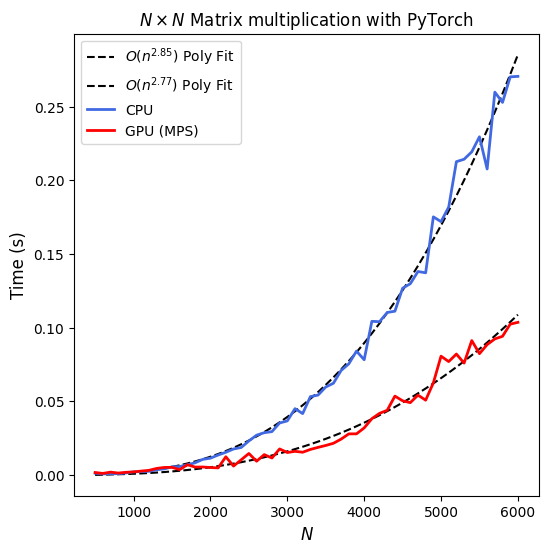

In [164]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.set_title(r"$N\times N$ Matrix multiplication with PyTorch")

ax.plot(x_val, [c_opt_cpu*np.pow(x, n_opt_cpu) for x in x_val], label=r"$O(n^{2.85})$ Poly Fit", color="black", ls="--", lw=1.5)
ax.plot(x_val, [c_opt_gpu*np.pow(x, n_opt_gpu) for x in x_val], label=r"$O(n^{2.77})$ Poly Fit", color="black", ls="--", lw=1.5)
ax.plot(x_val, cpu_times, label="CPU", color="royalblue", lw=2)
ax.plot(x_val, gpu_times, label="GPU (MPS)", color="red", lw=2)

ax.set_xlabel(r"$N$", fontsize=12)
ax.set_ylabel("Time (s)", fontsize=12)
ax.legend()